In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
import cv2
import os

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

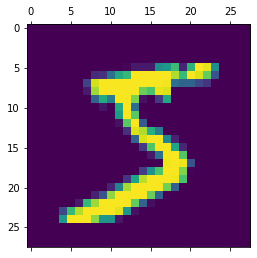

In [4]:
plt.matshow(X_train[0])

In [5]:
y_train[0]

5

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train = X_train / 255
X_test = X_test / 255 

In [12]:

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [9]:
X_train_flattened.shape


(60000, 784)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2779 - accuracy: 0.9214
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1245 - accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0862 - accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0662 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0527 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0419 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0340 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0287 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0233 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.019

In [10]:
'''model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2779 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1275 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0896 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0679 - accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0539 - accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0436 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0350 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0286 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0244 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.019

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 0s 994us/step


In [16]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

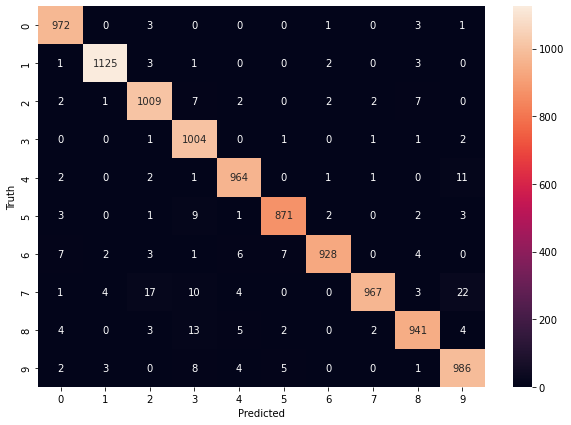

In [17]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
y0=model.predict(X_test_flattened)
y0[0]

313/313 [==============================] - 0s 1ms/step


array([1.1393721e-05, 1.7826144e-04, 7.0283371e-01, 9.9912620e-01,
       4.7418971e-06, 2.8179295e-04, 1.6334881e-10, 9.9999118e-01,
       4.0256655e-01, 4.4449586e-01], dtype=float32)

In [20]:

np.argmax(y0[1])

2

In [21]:
X_test_flattened[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [25]:
model.predict(X_test_flattened)

313/313 [==============================] - 0s 993us/step


array([[1.1393721e-05, 1.7826144e-04, 7.0283371e-01, ..., 9.9999118e-01,
        4.0256655e-01, 4.4449586e-01],
       [2.1331343e-04, 9.7002673e-01, 1.0000000e+00, ..., 1.7536160e-11,
        7.4009053e-02, 8.5726010e-11],
       [1.6039829e-05, 9.9933058e-01, 3.3783412e-01, ..., 2.1201390e-01,
        4.5401329e-01, 3.5070378e-04],
       ...,
       [2.1874917e-10, 1.1835879e-05, 1.6389237e-07, ..., 4.0039352e-01,
        3.1359079e-01, 9.9970591e-01],
       [1.2368396e-03, 6.9641096e-06, 3.7210816e-06, ..., 4.7400457e-04,
        9.9562174e-01, 4.8668824e-07],
       [2.6514901e-02, 1.2471294e-07, 4.1876864e-01, ..., 9.2450901e-11,
        5.1135389e-04, 3.7015758e-07]], dtype=float32)

In [29]:
model.evaluate(X_test_flattened,y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.0846 - accuracy: 0.9767


[0.08455554395914078, 0.9767000079154968]